# Week-2 Assignment

As a part of 4-week Machine Learning Internship ACM Code of League 2.0

welcome to week 2
If you are reading this, you probably have a decent overview of feature engineering and ML
This week's assignment is a little tricky but comparitively easier than last time

You have to design 3 functions:
1. A data cleaning pipeline - you will be given the training data beforehand and all the data cleaning process should be ecompassed in this function.Create the function is such a way that it only takes the input of the name of the file and it outputs a cleaned and ready to work dataframe
2. An ML model trainer function-a function which when given data in form of x,y returns a trained model
3. An Ml model tester function- a function which when given test data (x) and actual predictions(y) returns the accuracy and if possible prints a plot of confusion matrix

scoring:
data visualization of dataset: 2, creation of function 1: 3, creation of function 2: 2, creation if function 3: 3

I believe you guys will get very good accuracy so accuracy holds bonus points if and only if it is in the range of 85 to 95

only training data will be provided and test data will be given while on video call with the team leader and he or his teammate shall present their work.

code is to be submitted by saturday midnight
date of evaluation will be released soon.

In [2]:
#import basic libraries for preprocessing and EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import warnings
import math

#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#importing ploting libraries
import matplotlib.pyplot as plt

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Import SMOTE library for handling imbalance class
from imblearn.over_sampling import SMOTE

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 

#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.


## Importing Dataset

In [4]:
df=pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Data Preprocessing 

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Task-1

**Function 1 - Cleaner function which takes the file by its name and returns the processable Dataframe**

In [8]:
def cleaner(file):
  #converting to dataframe first
  df=pd.read_csv(file)
  #adding user to the dataframe
  df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
  df = pd.concat([df_user, df], axis=1)
  return df

In [9]:
my_df = cleaner("bank-full.csv")

In [10]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
user         45211 non-null int64
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [11]:
my_df.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.00000,45211.00000,45211.00000,45211.00000,45211.00000,45211.00000,45211.00000,45211.00000
mean,22605.00000,40.93621,1362.27206,15.80642,258.16308,2.76384,40.19783,0.58032
std,13051.43585,10.61876,3044.76583,8.32248,257.52781,3.09802,100.12875,2.30344
min,0.00000,18.00000,-8019.00000,1.00000,0.00000,1.00000,-1.00000,0.00000
25%,11302.50000,33.00000,72.00000,8.00000,103.00000,1.00000,-1.00000,0.00000
50%,22605.00000,39.00000,448.00000,16.00000,180.00000,2.00000,-1.00000,0.00000
75%,33907.50000,48.00000,1428.00000,21.00000,319.00000,3.00000,-1.00000,0.00000
max,45210.00000,95.00000,102127.00000,31.00000,4918.00000,63.00000,871.00000,275.00000


In [12]:
my_df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

## Exploratory Data Analysis

In [13]:
my_df.dtypes

user          int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [14]:
#checking whether column is categorical data or numerical

In [15]:
my_df['job']=my_df.job.astype('category')
my_df['marital']=my_df.marital.astype('category')
my_df['education']=my_df.education.astype('category')
my_df['default']=my_df.default.astype('category')
my_df['housing']=my_df.housing.astype('category')
my_df['loan']=my_df.loan.astype('category')
my_df['contact']=my_df.contact.astype('category')
my_df['month']=my_df.month.astype('category')
my_df['poutcome']=my_df.poutcome.astype('category')
#bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
my_df.dtypes

user            int64
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [16]:
my_df.shape

(45211, 18)

In [17]:
my_df.groupby('y').mean()

,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.50308,40.83899,1303.71497,15.89229,221.18281,2.84635,36.42137,0.50215
yes,33228.95387,41.67007,1804.26791,15.15825,537.29457,2.14105,68.70297,1.17035


In [18]:
#checking counts of dependent attribute
my_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [19]:
#Checking Null Values
my_df.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [20]:
my_df.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

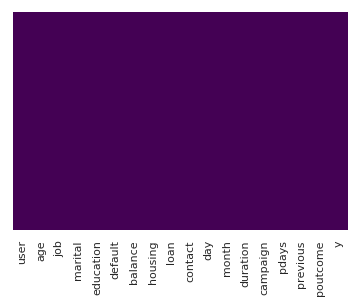

In [21]:
#verifying null values
sns.heatmap(my_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

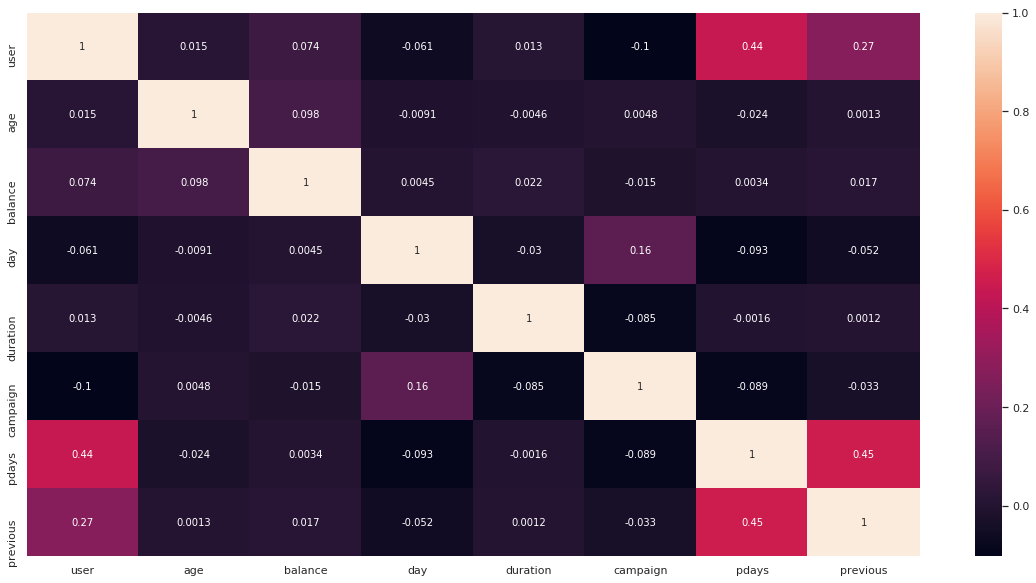

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(data=my_df.corr(), annot=True)

In [22]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,45211.00000,22605.00000,13051.43585,0.00000,11302.50000,22605.00000,33907.50000,45210.00000
age,45211.00000,40.93621,10.61876,18.00000,33.00000,39.00000,48.00000,95.00000
balance,45211.00000,1362.27206,3044.76583,-8019.00000,72.00000,448.00000,1428.00000,102127.00000
day,45211.00000,15.80642,8.32248,1.00000,8.00000,16.00000,21.00000,31.00000
duration,45211.00000,258.16308,257.52781,0.00000,103.00000,180.00000,319.00000,4918.00000
campaign,45211.00000,2.76384,3.09802,1.00000,1.00000,2.00000,3.00000,63.00000
pdays,45211.00000,40.19783,100.12875,-1.00000,-1.00000,-1.00000,-1.00000,871.00000
previous,45211.00000,0.58032,2.30344,0.00000,0.00000,0.00000,0.00000,275.00000


In [23]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()
my_df['job']=labelencoder_X.fit_transform(my_df['job'])
my_df['marital']=labelencoder_X.fit_transform(my_df['marital'])
my_df['education']=labelencoder_X.fit_transform(my_df['education'])
my_df['default']=labelencoder_X.fit_transform(my_df['default'])
my_df['housing']=labelencoder_X.fit_transform(my_df['housing'])
my_df['loan']=labelencoder_X.fit_transform(my_df['loan'])
my_df['contact']= labelencoder_X.fit_transform(my_df['contact']) 
my_df['month']= labelencoder_X.fit_transform(my_df['month']) 
my_df['poutcome'] = labelencoder_X.fit_transform(my_df['poutcome'])
my_df['y'] = labelencoder_X.fit_transform(my_df['y'])

In [24]:
my_df.head()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [25]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,45211.00000,22605.00000,13051.43585,0.00000,11302.50000,22605.00000,33907.50000,45210.00000
age,45211.00000,40.93621,10.61876,18.00000,33.00000,39.00000,48.00000,95.00000
job,45211.00000,4.33976,3.27266,0.00000,1.00000,4.00000,7.00000,11.00000
marital,45211.00000,1.16772,0.60823,0.00000,1.00000,1.00000,2.00000,2.00000
education,45211.00000,1.22481,0.74800,0.00000,1.00000,1.00000,2.00000,3.00000
default,45211.00000,0.01803,0.13305,0.00000,0.00000,0.00000,0.00000,1.00000
balance,45211.00000,1362.27206,3044.76583,-8019.00000,72.00000,448.00000,1428.00000,102127.00000
housing,45211.00000,0.55584,0.49688,0.00000,0.00000,1.00000,1.00000,1.00000
loan,45211.00000,0.16023,0.36682,0.00000,0.00000,0.00000,0.00000,1.00000
contact,45211.00000,0.64024,0.89795,0.00000,0.00000,0.00000,2.00000,2.00000


## Multivariate Analysis

In [80]:
# corrlation matrix 
cor=my_df.corr()
cor

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
user,1.00000,0.01497,0.06300,0.08178,0.09466,-0.05310,0.07364,-0.17614,-0.08424,-0.72237,-0.06146,-0.16205,0.01303,-0.10288,0.43773,0.27110,-0.44537,0.29629
age,0.01497,1.00000,-0.02187,-0.40324,-0.10681,-0.01788,0.09778,-0.18551,-0.01566,0.02622,-0.00912,-0.04236,-0.00465,0.00476,-0.02376,0.00129,0.00737,0.02516
job,0.06300,-0.02187,1.00000,0.06205,0.16671,-0.00685,0.01823,-0.12536,-0.03300,-0.08206,0.02286,-0.09287,0.00474,0.00684,-0.02446,-0.00091,0.01101,0.04044
marital,0.08178,-0.40324,0.06205,1.00000,0.10858,-0.00702,0.00212,-0.01610,-0.04689,-0.03920,-0.00526,-0.00699,0.01185,-0.00899,0.01917,0.01497,-0.01685,0.04559
education,0.09466,-0.10681,0.16671,0.10858,1.00000,-0.01072,0.06451,-0.09079,-0.04857,-0.11093,0.02267,-0.05730,0.00194,0.00626,0.00005,0.01757,-0.01936,0.06624
default,-0.05310,-0.01788,-0.00685,-0.00702,-0.01072,1.00000,-0.06675,-0.00603,0.07723,0.01540,0.00942,0.01149,-0.01002,0.01682,-0.02998,-0.01833,0.03490,-0.02242
balance,0.07364,0.09778,0.01823,0.00212,0.06451,-0.06675,1.00000,-0.06877,-0.08435,-0.02727,0.00450,0.01978,0.02156,-0.01458,0.00344,0.01667,-0.02097,0.05284
housing,-0.17614,-0.18551,-0.12536,-0.01610,-0.09079,-0.00603,-0.06877,1.00000,0.04132,0.18812,-0.02798,0.27148,0.00508,-0.02360,0.12418,0.03708,-0.09997,-0.13917
loan,-0.08424,-0.01566,-0.03300,-0.04689,-0.04857,0.07723,-0.08435,0.04132,1.00000,-0.01087,0.01137,0.02214,-0.01241,0.00998,-0.02275,-0.01104,0.01546,-0.06819
contact,-0.72237,0.02622,-0.08206,-0.03920,-0.11093,0.01540,-0.02727,0.18812,-0.01087,1.00000,-0.02794,0.36114,-0.02084,0.01961,-0.24482,-0.14781,0.27221,-0.14839


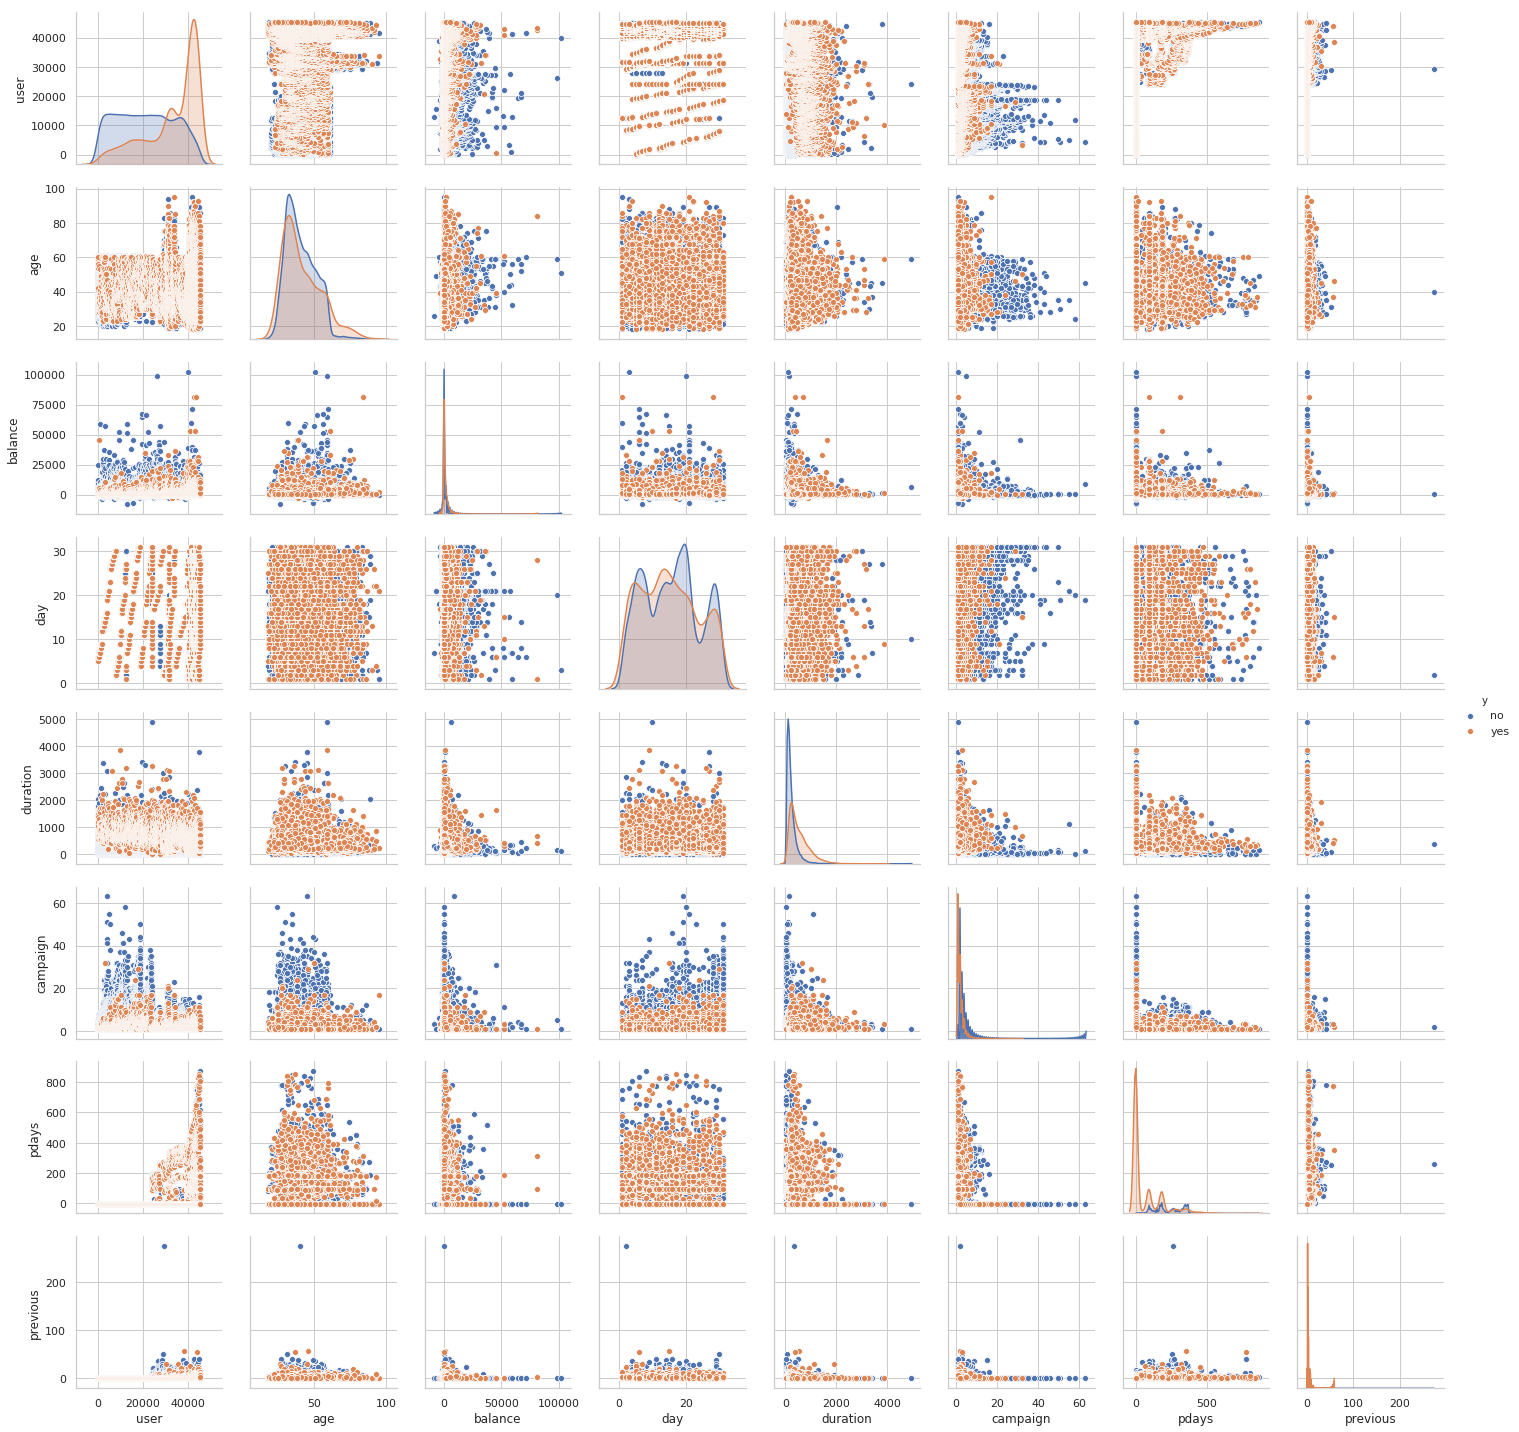

In [22]:
sns.pairplot(my_df,hue='y')

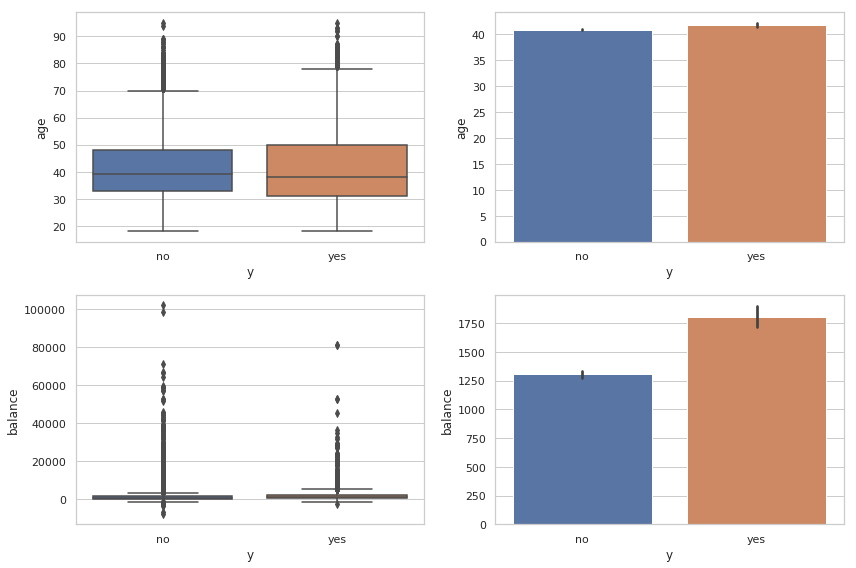

In [23]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
# Categorical vs Continuous ----y vs Age
#boxplot
sns.boxplot(x="y", y="age", data=df,ax=ax[0][0])

#barplot
sns.barplot(x="y", y="age", data=df,ax=ax[0][1])


# Categorical vs Continuous ----y vs balance
#boxplot
sns.boxplot(x="y", y="balance", data=df,ax=ax[1][0])


#barplot
sns.barplot(x="y", y="balance", data=df,ax=ax[1][1])

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


# Age

In [25]:
#Central values
print('Minimum age: ', df['age'].min())
print('Maximum age: ', df['age'].max())
print('Mean value: ', df['age'].mean())
print('Median value: ', df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())

Minimum age:  18
Maximum age:  95
Mean value:  40.93621021432837
Median value:  39.0
Standard deviation:  10.618762040975431
Null values:  False


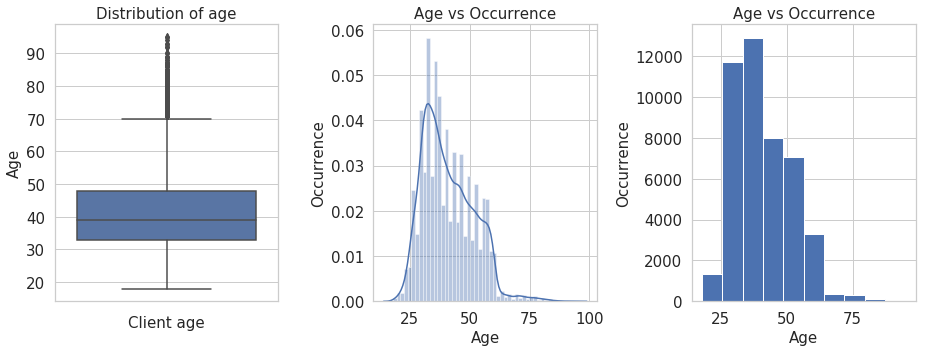

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))


#boxplot

sns.boxplot(x='age',data=df,orient='v',ax=ax1)

ax1.set_xlabel('Client age', fontsize=15)

ax1.set_ylabel('Age', fontsize=15)

ax1.set_title('Distribution of age', fontsize=15)

ax1.tick_params(labelsize=15)


#distplot

sns.distplot(df['age'],ax=ax2)

ax2.set_xlabel('Age', fontsize=15)

ax2.set_ylabel('Occurrence', fontsize=15)

ax2.set_title('Age vs Occurrence', fontsize=15)

ax2.tick_params(labelsize=15)


#histogram

ax3.hist(df['age'])

ax3.set_xlabel('Age', fontsize=15)

ax3.set_ylabel('Occurrence', fontsize=15)

ax3.set_title('Age vs Occurrence', fontsize=15)

ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)

plt.tight_layout() 

# Job

In [28]:
print('Jobs: \n', df['job'].unique())

Jobs: 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [30]:
df.groupby('job').size()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

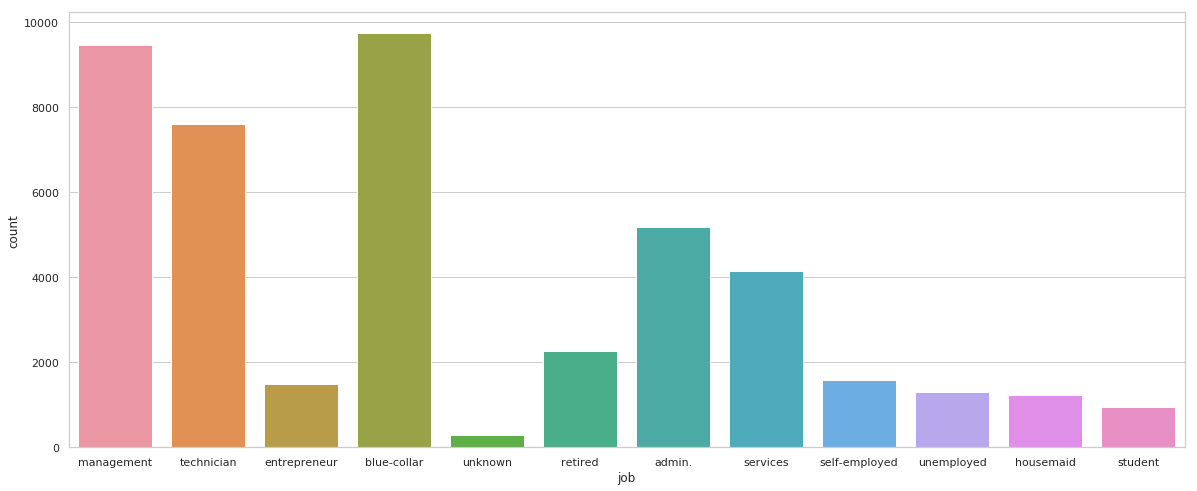

In [31]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(df['job'],data=df)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

# Marital

In [32]:
print('Marital: \n', df['marital'].unique())

Marital: 
 ['married' 'single' 'divorced']


In [33]:
df.groupby('marital').size()

marital
divorced     5207
married     27214
single      12790
dtype: int64

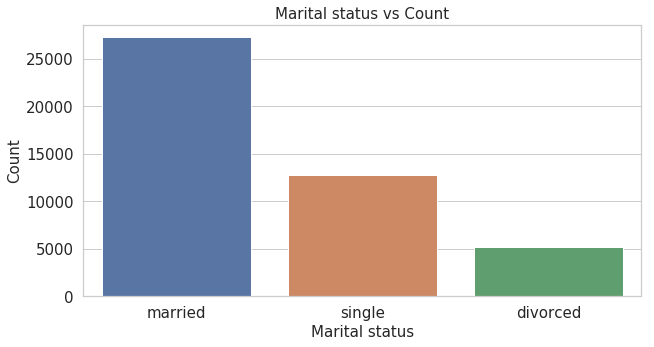

In [36]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['marital'],data=df)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status vs Count', fontsize=15)
ax.tick_params(labelsize=15)
# output shows that married people are taking more subscriptions than the other people.

# Education

In [38]:
print('Education: \n', df['education'].unique())

Education: 
 ['tertiary' 'secondary' 'unknown' 'primary']


In [39]:
df.groupby('education').size()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

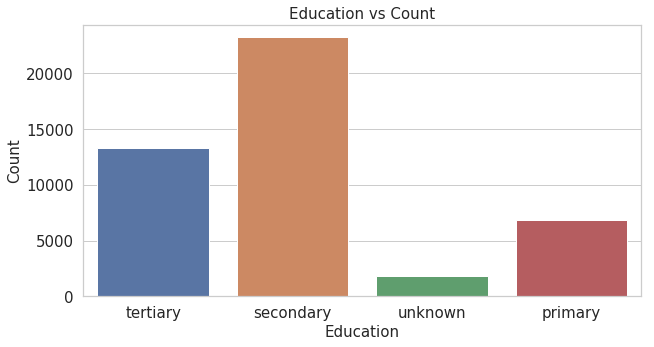

In [40]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['education'],data=df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# Default, Housing, Loan

In [41]:
print('Default: \n', df['default'].unique())

Default: 
 ['no' 'yes']


In [42]:
df.groupby('default').size()

default
no     44396
yes      815
dtype: int64

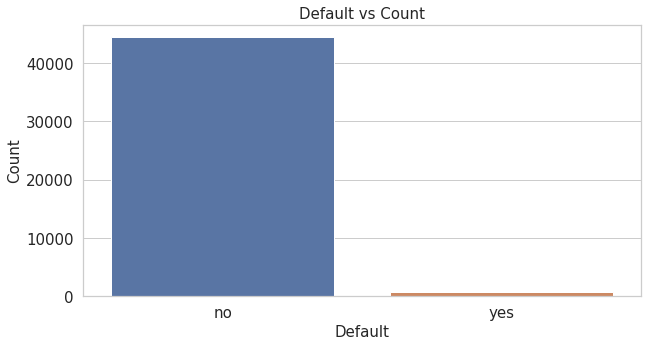

In [43]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['default'],data=df)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [44]:
print('Housing: \n', df['housing'].unique())

Housing: 
 ['yes' 'no']


In [45]:
df.groupby('housing').size()

housing
no     20081
yes    25130
dtype: int64

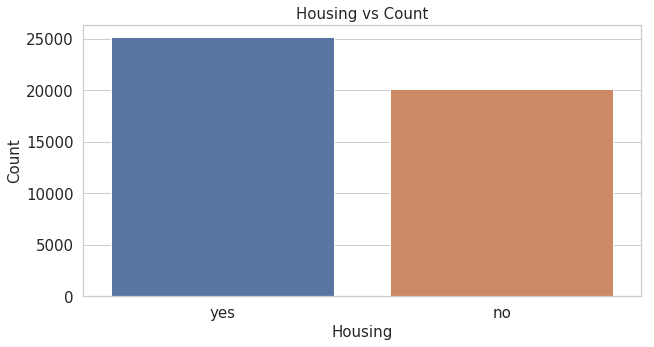

In [46]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['housing'],data=df)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [47]:
print('Loan: \n', df['loan'].unique())

Loan: 
 ['no' 'yes']


In [48]:
df.groupby('loan').size()

loan
no     37967
yes     7244
dtype: int64

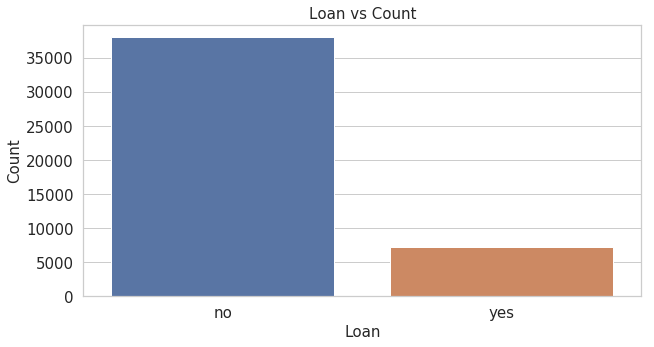

In [49]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['loan'],data=df)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# Balance

Central values

In [51]:
print('Minimum balance: ', df['balance'].min())
print('Maximum balance: ',df['balance'].max())
print('Mean value: ', df['balance'].mean())
print('Median value: ',df['balance'].median())
print('Standard deviation: ', df['balance'].std())
print('Null values: ',df['balance'].isnull().any())

Minimum balance:  -8019
Maximum balance:  102127
Mean value:  1362.2720576850766
Median value:  448.0
Standard deviation:  3044.7658291686002
Null values:  False


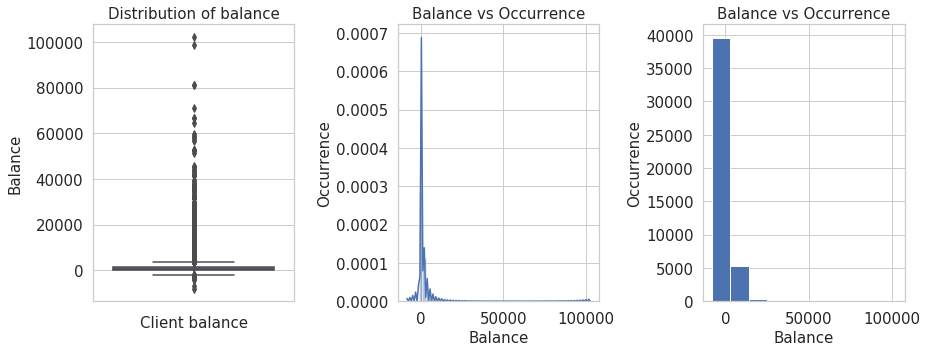

In [52]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='balance',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['balance'])
ax3.set_xlabel('Balance', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Balance vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# Contact

In [53]:
print('Contact: \n', df['contact'].unique())

Contact: 
 ['unknown' 'cellular' 'telephone']


In [54]:
df.groupby('contact').size()

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

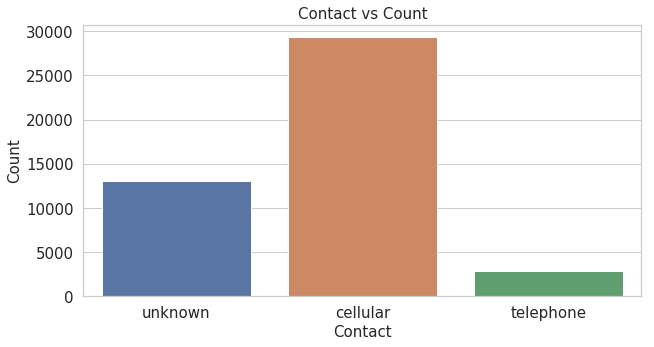

In [55]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['contact'],data=df)
ax.set_xlabel('Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# Day, Month

In [56]:
print('Day: \n',df['loan'].unique())
print('Month: \n',df['loan'].unique())

Day: 
 ['no' 'yes']
Month: 
 ['no' 'yes']


In [57]:
print('Count values in Day: \n',df.groupby('loan').size())
print('Count values in Month: \n', df.groupby('loan').size())

Count values in Day: 
 loan
no     37967
yes     7244
dtype: int64
Count values in Month: 
 loan
no     37967
yes     7244
dtype: int64


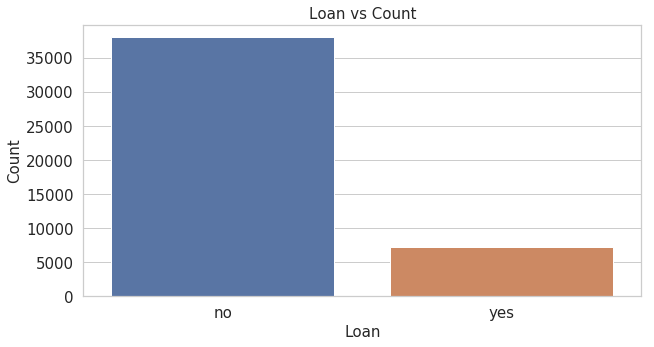

In [58]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['loan'],data=df)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

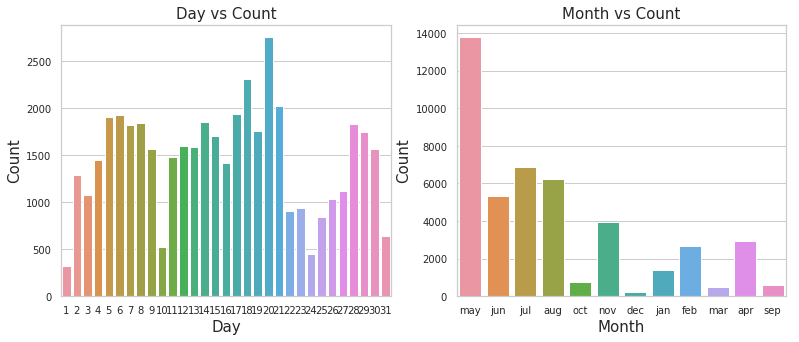

In [59]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#countplot
sns.countplot(df['day'],data=df,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Day vs Count', fontsize=15)
ax1.tick_params(labelsize=10)

#distplot
sns.countplot(df['month'],data=df,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Month vs Count', fontsize=15)
ax2.tick_params(labelsize=10)

# Duration

In [60]:
#central Values
print('Minimum duration calls in seconds: ', df['duration'].min())
print('Maximum duration calls in seconds: ',df['duration'].max())
print('Mean duration calls in seconds: ', df['duration'].mean())
print('Median duration calls in seconds: ',df['duration'].median())
print('Standard deviation: ', df['duration'].std())
print('Null values: ',df['duration'].isnull().any())

Minimum duration calls in seconds:  0
Maximum duration calls in seconds:  4918
Mean duration calls in seconds:  258.1630797814691
Median duration calls in seconds:  180.0
Standard deviation:  257.52781226517095
Null values:  False


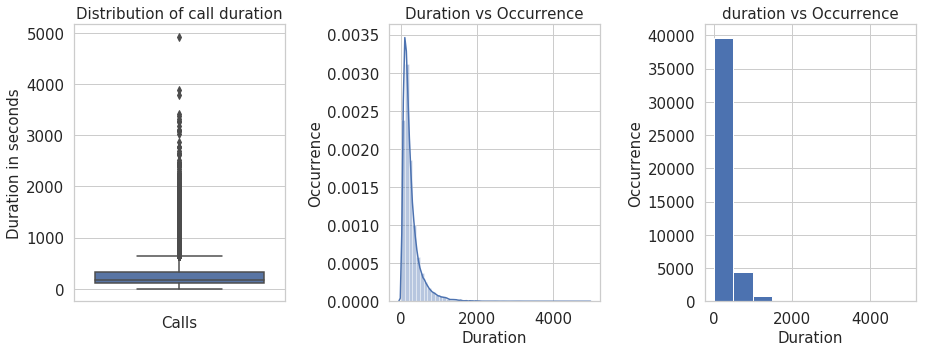

In [61]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='duration',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Calls', fontsize=15)
ax1.set_ylabel('Duration in seconds', fontsize=15)
ax1.set_title('Distribution of call duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('duration vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# poutcome

In [62]:
print('Poutcome: \n',df['poutcome'].unique())

Poutcome: 
 ['unknown' 'failure' 'other' 'success']


In [63]:
print(df.groupby('poutcome').size())

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


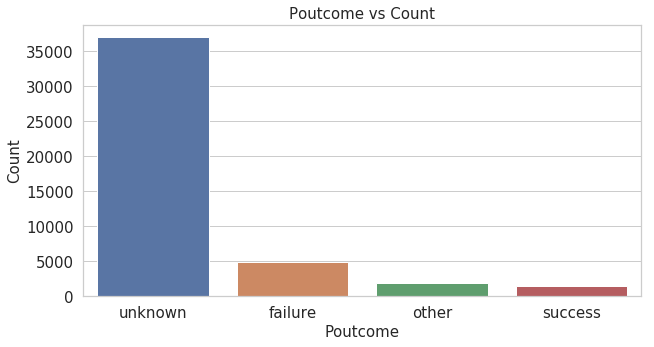

In [64]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['poutcome'],data=df)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Dependent attribute
# y

In [65]:
print('y: \n', df['y'].unique())

y: 
 ['no' 'yes']


In [66]:
print(df.groupby('y').size())

y
no     39922
yes     5289
dtype: int64


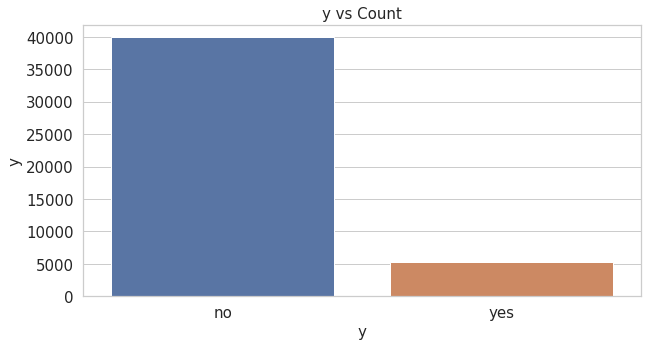

In [68]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(df['y'],data=df)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('y vs Count', fontsize=15)
ax.tick_params(labelsize=15)

## Task-3

An ML model trainer function-a function which when given data in form of x,y returns a trained model

In [26]:
#splitting the dataset
#independent and dependent variables
X=my_df.loc[:,my_df.columns!='y']
Y=my_df.loc[:,my_df.columns=='y']

In [27]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
columns=X_train.columns

In [28]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option                             
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100 )
#Fitting the model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [29]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Important"], index = X_train.columns))

           Important
user         0.30046
age          0.06285
job          0.03277
marital      0.01167
education    0.01483
default      0.00098
balance      0.07548
housing      0.02268
loan         0.00681
contact      0.00662
day          0.04716
month        0.02590
duration     0.32348
campaign     0.02523
pdays        0.02370
previous     0.00772
poutcome     0.01164


In [30]:
#Making the prediction
Y_predict = dt_model.predict(X_test)

In [31]:
# performance on train data
print('Performance on Training data using DT: ',dt_model.score(X_train , Y_train))
# performance on test data
print('Performance on Testing data using DT: ',dt_model.score(X_test , Y_test))

Performance on Training data using DT:  1.0
Performance on Testing data using DT:  0.8840312592155706


It is a overfitting in the model as the dataset is performing 100% accurately in trainnig data. However, the accuracy of the testing data drops.

### Task-3

An Ml model tester function- a function which when given test data (x) and actual predictions(y) returns the accuracy and if possible prints a plot of confusion matrix

 **Confusion Matrices for respective methods are placed there along with accuracy scores**

# 1. Decision Tree Model

In [32]:
acc_DT=metrics.accuracy_score(Y_test, Y_predict)
print('Confusion Matrix DT: \n',metrics.confusion_matrix(Y_test, Y_predict))
print('Classification report DT: \n',metrics.classification_report(Y_test, Y_predict))  

Confusion Matrix DT: 
 [[11177   792]
 [  781   814]]
Classification report DT: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11969
           1       0.51      0.51      0.51      1595

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.72      0.72      0.72     13564
weighted avg       0.88      0.88      0.88     13564



In [33]:
#Evaluate the model using accuracy
acc_DT=metrics.accuracy_score(Y_test, Y_predict)
print('Accuracy DT: ',acc_DT)

Accuracy DT:  0.8840312592155706


Using Decision Tree Model, we got accuracy of 11854/13564 = 88% and 12% as misclassification error.

In [73]:
#Store the accuracy results for each model in a dataframe for final comparison
resulti = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
resulti = resulti[['Method', 'accuracy']]
resulti

,Method,accuracy
1,Decision Tree,0.88403


# 2. Using Random Forest 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=100)
rfcl = rfcl.fit(X_train, Y_train)

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
Y_predict = rfcl.predict(X_test)
acc_RF=metrics.accuracy_score(Y_test , Y_predict)
print('Accuracy using Random forest: ',acc_RF)
print('Confusion Matrix Random Forest: \n',metrics.confusion_matrix(Y_test, Y_predict))

Accuracy using Random forest:  0.9071807726334414
Confusion Matrix Random Forest: 
 [[11500   469]
 [  790   805]]


In [76]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]},index={'2'})
resulti = pd.concat([resulti, tempResultsDf])
resulti = resulti[['Method', 'accuracy']]
resulti

,Method,accuracy
1,Decision Tree,0.88403
2,Random Forest,0.90718


* As Compared to the decision tree, we can see that the accuracy has significantly improved for the Random forest model.

## 3. Ensemble Logistic Regression, Naive Bayes, Decision Tree

In [66]:
#Multiple model Ensemble
from sklearn import svm
LR=LogisticRegression()
NB=GaussianNB()
#DT=DecisionTreeClassifier()  ('DT',DT),
SVM=svm.SVC() 

In [64]:
evc=VotingClassifier(estimators=[('LR',LR),('NB',NB),('SVM',SVM)],voting='hard')

In [65]:
evc.fit(X_train,Y_train)

/home/student/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly

VotingClassifier(estimators=[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('NB', Gaussian...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [58]:
Y_predict = evc.predict(X_test)
#evc.score(X_test,y_test)

In [59]:
acc_Ensemble=metrics.accuracy_score(Y_test, Y_predict)
print('Accuracy using Ensemble: ',acc_Ensemble)
print('Confusion Matrix: \n',metrics.confusion_matrix(Y_test, Y_predict))

Accuracy using Ensemble:  0.8871276909466234
Confusion Matrix: 
 [[11709   260]
 [ 1271   324]]


In [77]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_Ensemble]},index={'3'})
resulti = pd.concat([resulti, tempResultsDf])
resulti = resulti[['Method', 'accuracy']]
resulti

,Method,accuracy
1,Decision Tree,0.88403
2,Random Forest,0.90718
3,Ensemble,0.88713


 **Random Forest is giving the highest accuracy compared to others**

Accuracies of training and test datas for different methods are below

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/home/student/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)  
#You can change these hyperparameters like metric etc.
knn_clf.fit(X_train, Y_train)

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
print('Accuracy on training set:',knn_clf.score(X_train,Y_train))
print('Accuracy on test set:',knn_clf.score(X_test,Y_test))

Accuracy on training set: 0.9283976364268335
Accuracy on test set: 0.8927307578885284


In [47]:
from sklearn.svm import SVC
kernel_svm_clf = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_clf.fit(X_train, Y_train)

/home/student/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
print('Accuracy on training set:',kernel_svm_clf.score(X_train,Y_train))
print('Accuracy on test set:',kernel_svm_clf.score(X_test,Y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.8824093187850192


### Note: All methods giving accuracy between 85% to 95%

### Additional Visualizations

Part of Multi variate analysis

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

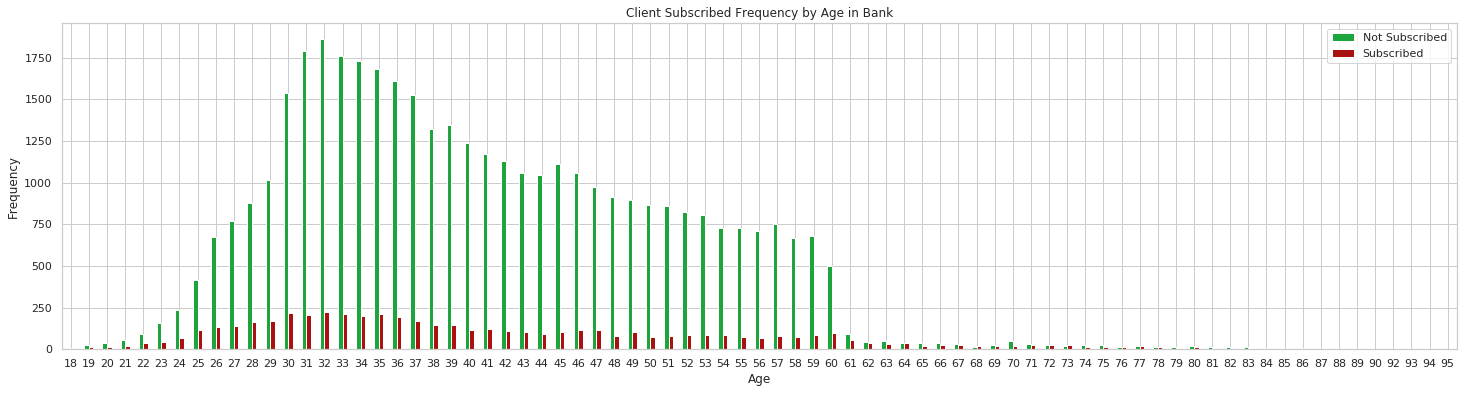

In [54]:
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(25,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency by Age in Bank')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Not Subscribed", "Subscribed"])
plt.ylabel('Frequency')
plt.show()

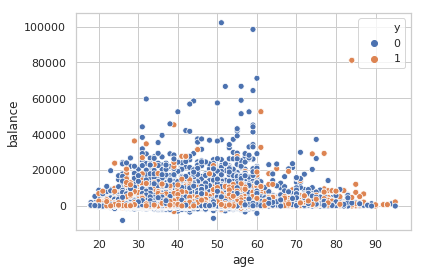

In [51]:
sns.scatterplot(x='age', y='balance',hue='y', data=my_df)

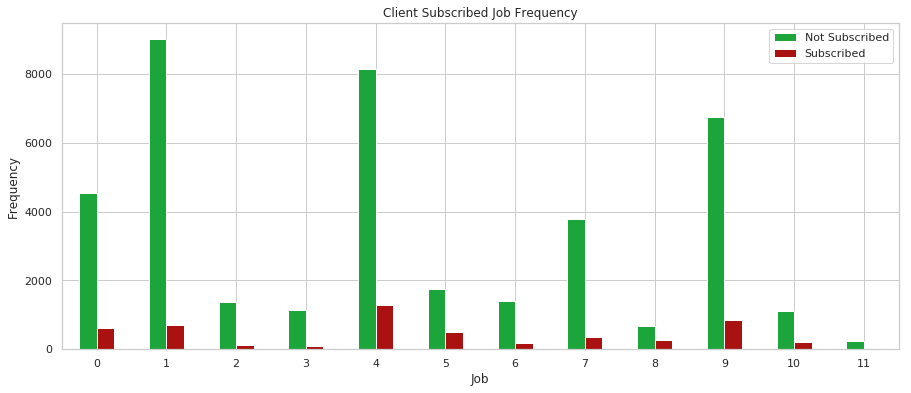

In [52]:
pd.crosstab(my_df.job,my_df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Job Frequency')
plt.xlabel('Job')
plt.xticks(rotation=0)
plt.legend(["Not Subscribed", "Subscribed"])
plt.ylabel('Frequency')
plt.show()

### The End